In [1]:
import meep as mp
from meep import Vector3 as vec

Using MPI version 3.1, 1 processes


In [2]:
cell_size  = vec(16,8)

In [3]:
resolution = 20

In [4]:
pml =  [mp.PML(1.0)]

In [5]:
geometry = [mp.Block(vec(mp.inf,1),material = mp.Medium(epsilon = 12))]

In [6]:
sources = [mp.Source(mp.ContinuousSource(frequency = 0.15),mp.Ez,center = vec(-7,0))]

In [7]:
sim = mp.Simulation(cell_size,resolution,geometry  = geometry,sources = sources,boundary_layers = pml)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000330952 s
Working in 2D dimensions.
Computational cell is 16 x 8 x 0 with resolution 20
     block, center = (0,0,0)
          size (1e+20,1,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 0.114299 s
-----------


<AxesSubplot:xlabel='X', ylabel='Y'>

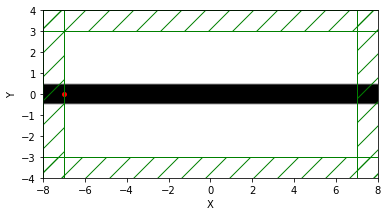

In [8]:
sim.plot2D()

In [9]:
sim.run(until = 200)

FloatProgress(value=0.0, description='0% done ', max=200.0)

run 0 finished at t = 200.0 (8000 timesteps)


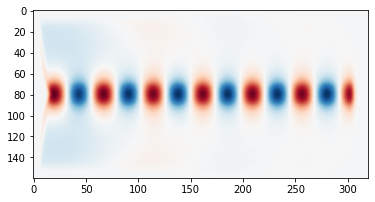

In [10]:
ez_data = sim.get_array(mp.Ez)
import matplotlib.pyplot as plt
plt.imshow(ez_data.transpose(),interpolation = 'spline36',cmap = 'RdBu')

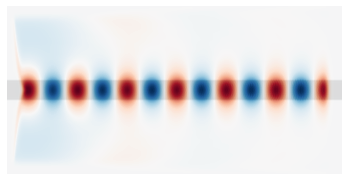

In [11]:
eps_data = sim.get_array(mp.Dielectric)
plt.figure()
plt.imshow(ez_data.transpose(),interpolation = 'spline36',cmap = 'RdBu')
plt.imshow(eps_data.transpose(),interpolation = 'spline36',cmap = 'binary',alpha = 0.1)
plt.axis('off')
plt.show()


In [12]:
 sim.get_epsilon()

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [13]:
sim.get_mu()

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [14]:
mp.output_poynting(sim)

creating output file "./s-000200.00.h5"...


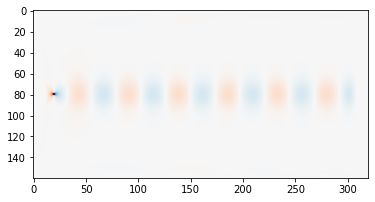

In [15]:
plt.imshow(sim.get_hfield_y().transpose(),cmap='RdBu')